In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import statsmodels.api as sm
from pylab import rcParams
import itertools
import plotly.graph_objects as go
import pickle
import os

os.chdir("/home/maina/Documents/Air Pollution Monitoring")

# import data_retrival and analysis functions
from data_analysis import *

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8

In [2]:
# Gets the data from firebase, process it and store it in a csv file
filepath = read_data()

# Read the dataset as a pandas dataframe
df = pd.read_csv(filepath)

# Display the first 10 rows
df

,timestamp,mq7,mq135,temperature,humidity
0,1639922725,162.0,39.0,24.1,73.0
1,1639923325,135.0,38.0,23.9,75.0
2,1639923927,118.0,36.0,24.0,72.0
3,1639924555,109.0,39.0,24.4,73.0
4,1639925428,102.0,42.0,24.2,74.0
...,...,...,...,...,...
2254,1641186170,55.0,32.0,24.6,47.0
2255,1641186477,60.0,33.0,24.2,48.0
2256,1641187397,62.0,33.0,23.8,51.0
2257,1641188316,58.0,31.0,22.7,56.0


In [3]:
# Converting the unix time stamp to datetime format
df["timestamp"] = pd.to_datetime(df['timestamp'], unit='s')
df["timestamp"] = df["timestamp"].dt.tz_localize('Africa/Nairobi')
df

,timestamp,mq7,mq135,temperature,humidity
0,2021-12-19 14:05:25+03:00,162.0,39.0,24.1,73.0
1,2021-12-19 14:15:25+03:00,135.0,38.0,23.9,75.0
2,2021-12-19 14:25:27+03:00,118.0,36.0,24.0,72.0
3,2021-12-19 14:35:55+03:00,109.0,39.0,24.4,73.0
4,2021-12-19 14:50:28+03:00,102.0,42.0,24.2,74.0
...,...,...,...,...,...
2254,2022-01-03 05:02:50+03:00,55.0,32.0,24.6,47.0
2255,2022-01-03 05:07:57+03:00,60.0,33.0,24.2,48.0
2256,2022-01-03 05:23:17+03:00,62.0,33.0,23.8,51.0
2257,2022-01-03 05:38:36+03:00,58.0,31.0,22.7,56.0


In [4]:
# Check if there are any missing values in the dataset
df.isnull().sum()

timestamp      0
mq7            0
mq135          0
temperature    0
humidity       0
dtype: int64

In [5]:
# Statistical summary of the dataset numerical columns
df.describe()

,mq7,mq135,temperature,humidity
count,2259.000000,2259.000000,2259.000000,2259.000000
mean,86.250996,41.467463,24.175255,62.943977
std,16.157806,8.528864,2.597867,10.145756
min,49.000000,27.000000,19.900000,22.000000
25%,78.000000,37.000000,22.450000,59.000000
50%,82.000000,40.000000,23.600000,66.400000
75%,90.000000,43.000000,25.050000,68.000000
max,199.000000,135.000000,35.700000,82.000000


In [6]:
# Resapmle dataset hourly using mean
raw_df = df.set_index("timestamp")
df = raw_df.resample(rule='H').mean()
df

,mq7,mq135,temperature,humidity
timestamp,,,,
2021-12-19 14:00:00+03:00,125.200000,38.800000,24.120000,73.400000
2021-12-19 15:00:00+03:00,95.000000,38.500000,23.983333,76.666667
2021-12-19 16:00:00+03:00,90.166667,36.166667,23.266667,77.666667
2021-12-19 17:00:00+03:00,97.200000,39.800000,23.240000,78.400000
2021-12-19 18:00:00+03:00,95.500000,39.500000,23.233333,79.833333
...,...,...,...,...
2022-01-03 01:00:00+03:00,75.000000,37.400000,22.600000,64.280000
2022-01-03 02:00:00+03:00,67.666667,34.833333,22.766667,60.800000
2022-01-03 03:00:00+03:00,54.000000,30.250000,23.637500,52.500000


In [7]:
# Statistical summary of the dataset numerical columns
df.describe()

,mq7,mq135,temperature,humidity
count,352.000000,352.000000,352.000000,352.000000
mean,87.077023,42.029334,24.492894,62.310476
std,13.675241,7.418984,2.496454,10.194331
min,51.750000,27.833333,21.012821,29.800000
25%,79.437500,38.250000,22.991667,58.005357
50%,84.400000,40.200000,23.837500,66.055000
75%,91.312500,43.350000,25.227841,67.862672
max,153.166667,88.500000,34.000000,81.333333


In [8]:
df

,mq7,mq135,temperature,humidity
timestamp,,,,
2021-12-19 14:00:00+03:00,125.200000,38.800000,24.120000,73.400000
2021-12-19 15:00:00+03:00,95.000000,38.500000,23.983333,76.666667
2021-12-19 16:00:00+03:00,90.166667,36.166667,23.266667,77.666667
2021-12-19 17:00:00+03:00,97.200000,39.800000,23.240000,78.400000
2021-12-19 18:00:00+03:00,95.500000,39.500000,23.233333,79.833333
...,...,...,...,...
2022-01-03 01:00:00+03:00,75.000000,37.400000,22.600000,64.280000
2022-01-03 02:00:00+03:00,67.666667,34.833333,22.766667,60.800000
2022-01-03 03:00:00+03:00,54.000000,30.250000,23.637500,52.500000


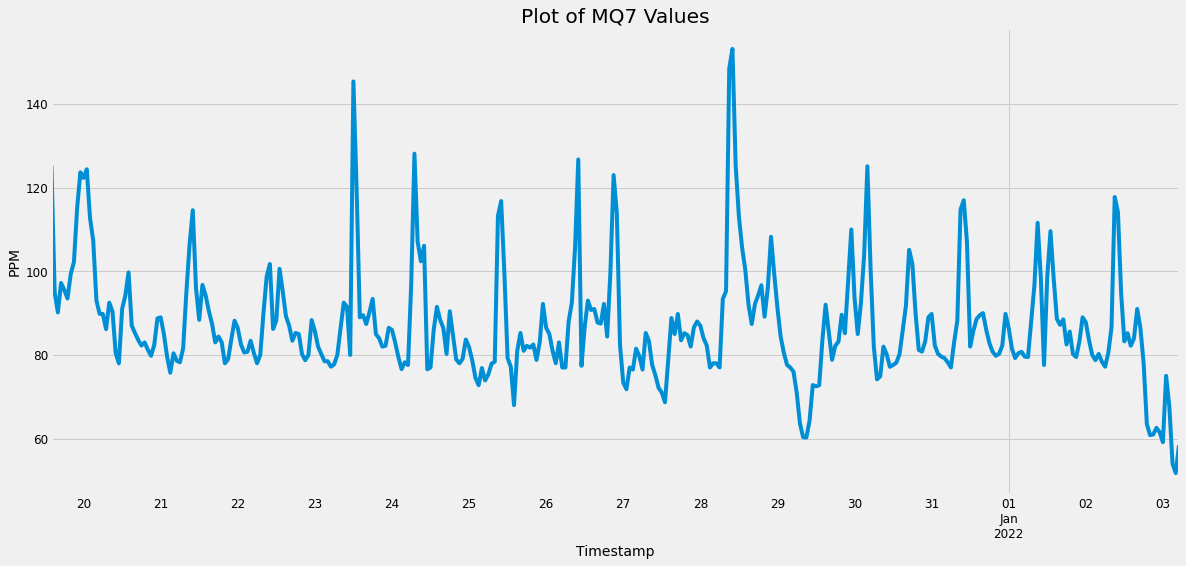

In [9]:
y_mq7 = df["mq7"]
y_mq7.plot(title="Plot of MQ7 Values")
plt.xlabel("Timestamp")
plt.ylabel("PPM")
plt.show()

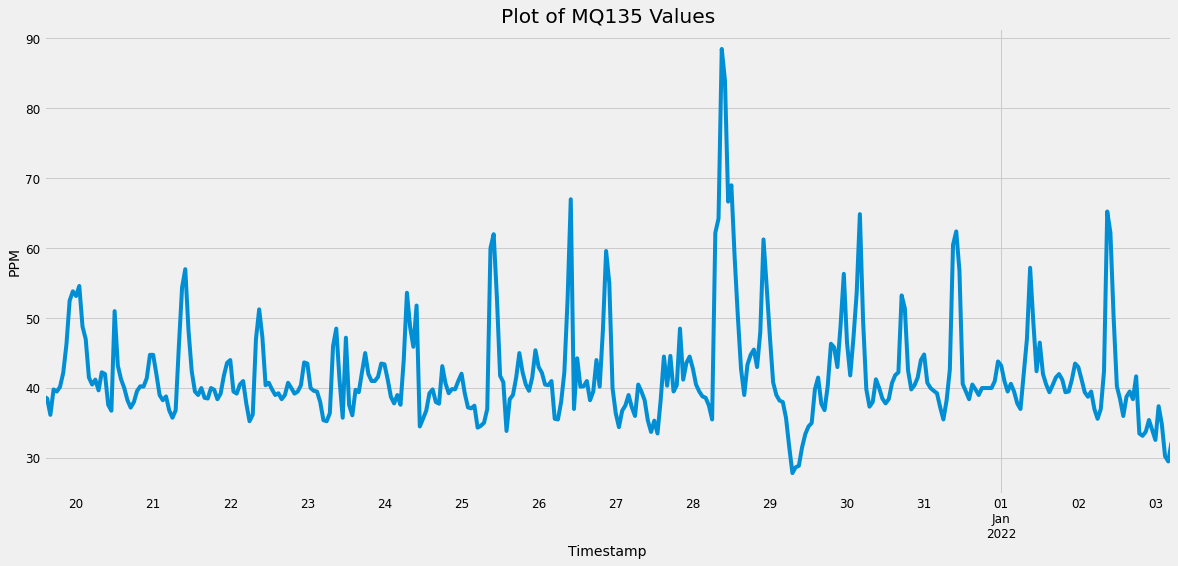

In [10]:
y_mq135 = df["mq135"]
y_mq135.plot(title="Plot of MQ135 Values")
plt.xlabel("Timestamp")
plt.ylabel("PPM")
plt.show()

## Visualizing time-series decomposition to establish the trend, seasonality and noise in the data

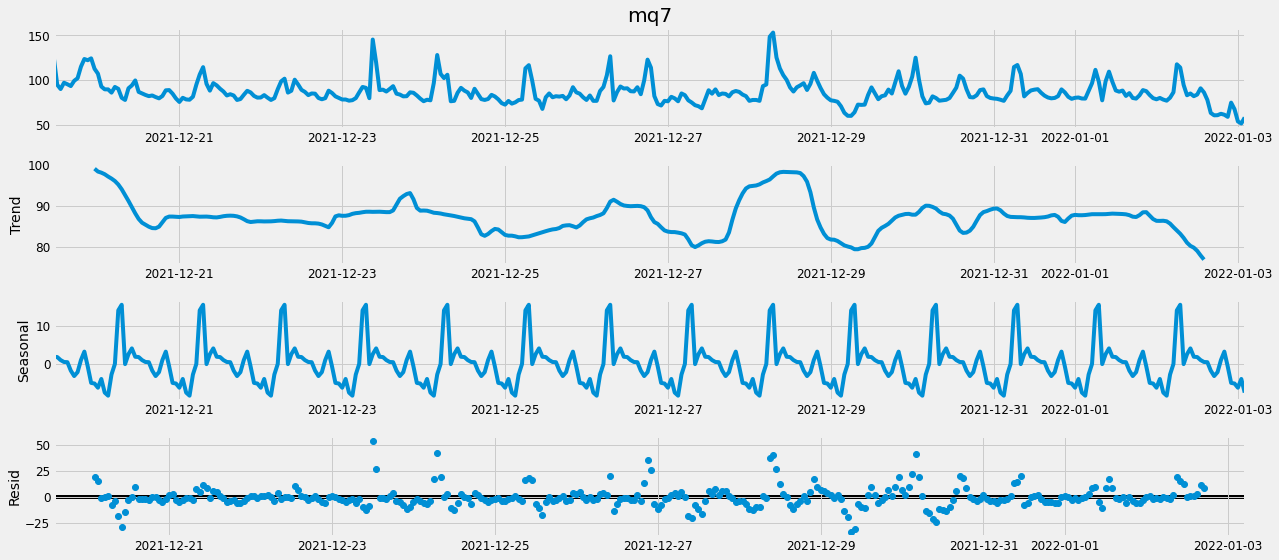

In [11]:
decomposition = sm.tsa.seasonal_decompose(y_mq7, model = 'additive')
fig = decomposition.plot()
plt.show()

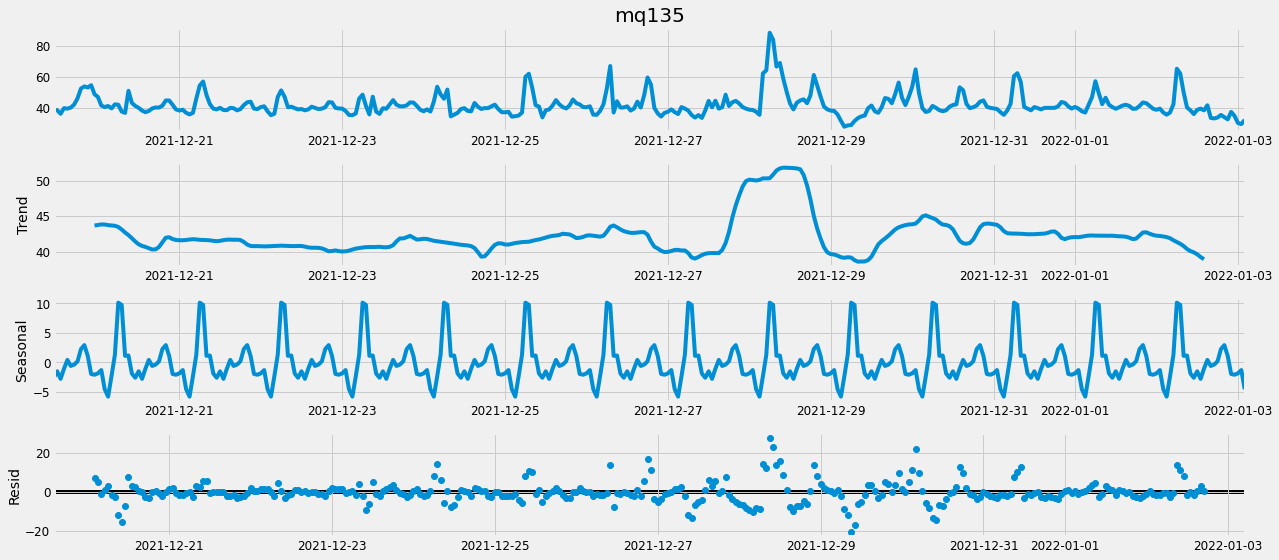

In [12]:
decomposition = sm.tsa.seasonal_decompose(y_mq135, model = 'additive')
fig = decomposition.plot()
plt.show()

## Autoregressive Integrated Moving Average (ARIMA)

In [13]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_mq7, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89788D+00    |proj g|=  1.42109D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.421D-09   5.898D+00
  F =   5.8978797442111075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4154.10733992462
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2968.230062935487
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98818D+00    |proj g|=  1.03798D-01

At iterate    5    f=  3.97415D+00    |proj g|=  6.61612D-02

At iterate   10    f=  3.93567D+00    |proj g|=  4.60837D-03

At iterate   15    f=  3.93549D+00    |proj g|=  4.99595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     23      1     0     0   3.037D-06   3.935D+00
  F =   3.9354921446671054     

CONVERGENCE: N

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      5      1     0     0   3.578D-06   4.409D+00
  F =   4.4089158280585217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3107.876742953199
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12335D+00    |proj g|=  1.31408D+01

At iterate    5    f=  4.27963D+00    |proj g|=  4.95899D-02

At iterate   10    f=  4.26105D+00    |proj g|=  2.12006D-01

At iterate   1

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   3.553D-06   4.075D+00
  F =   4.0753844853447596     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2873.0706776827105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01602D+00    |proj g|=  1.34871D-01


 This problem is unconstrained.



At iterate    5    f=  3.94935D+00    |proj g|=  1.52132D-02

At iterate   10    f=  3.93004D+00    |proj g|=  1.08548D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   1.904D-06   3.930D+00
  F =   3.9300431308899832     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2772.7503641465482
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56088D+00    |proj g|=  4.49768D-01

At iterate   

 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3712.277345517896
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50918D+00    |proj g|=  6.44354D-01


 This problem is unconstrained.



At iterate    5    f=  5.46308D+00    |proj g|=  9.98486D-03

At iterate   10    f=  5.43894D+00    |proj g|=  2.16794D-01

At iterate   15    f=  4.87235D+00    |proj g|=  2.16078D-01

At iterate   20    f=  4.86014D+00    |proj g|=  1.73850D-01

At iterate   25    f=  4.85705D+00    |proj g|=  2.85419D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     36      1     0     0   1.062D-06   4.857D+00
  F =   4.8570504767153899     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3425.3635356076343
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate   10    f=  3.92090D+00    |proj g|=  9.19544D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     14      1     0     0   9.195D-06   3.921D+00
  F =   3.9209001141665500     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2764.3136803732514
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79508D+00    |proj g|=  4.95669D-01


 This problem is unconstrained.



At iterate    5    f=  3.75315D+00    |proj g|=  5.72835D-02

At iterate   10    f=  3.64158D+00    |proj g|=  1.00960D-02

At iterate   15    f=  3.64057D+00    |proj g|=  4.70766D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     25      1     0     0   7.542D-07   3.641D+00
  F =   3.6405707226909025     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2568.9617887743952
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  5.39578D+00    |proj g|=  5.17226D-02

At iterate   15    f=  5.30865D+00    |proj g|=  9.96095D-02

At iterate   20    f=  4.36581D+00    |proj g|=  1.30752D-01

At iterate   25    f=  4.11885D+00    |proj g|=  1.02120D-02

At iterate   30    f=  4.10218D+00    |proj g|=  1.26218D-01

At iterate   35    f=  4.09469D+00    |proj g|=  3.88182D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     72      1     0     0   5.560D-06   4.095D+00
  F =   4.0946850732130331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2888.658291541

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46087D+00    |proj g|=  7.28975D-01

At iterate    5    f=  5.41822D+00    |proj g|=  1.11810D-02

At iterate   10    f=  5.35090D+00    |proj g|=  8.36562D-01

At iterate   15    f=  5.13367D+00    |proj g|=  4.72352D-02

At iterate   20    f=  4.34697D+00    |proj g|=  6.86192D-01

At iterate   25    f=  3.94761D+00    |proj g|=  7.52873D-02

At iterate   30    f=  3.88830D+00    |proj g|=  1.24348D-01

At iterate   35    f=  3.83420D+00    |proj g|=  3.23242D-02

At iterate   40    f=  3.82481D+00    |proj g|=  3.65255D-02

At iterate   45    f=  3.82432D+00    |proj g|=  3.78143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.81636D+00    |proj g|=  4.31272D-02

At iterate   10    f=  3.77551D+00    |proj g|=  1.32243D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   2.479D-06   3.776D+00
  F =   3.7755102194928196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2663.959194522945
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84158D+00    |proj g|=  7.64634D-01


 This problem is unconstrained.



At iterate    5    f=  3.75780D+00    |proj g|=  3.44966D-02

At iterate   10    f=  3.69052D+00    |proj g|=  2.43323D-01

At iterate   15    f=  3.63667D+00    |proj g|=  9.25721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.547D-06   3.637D+00
  F =   3.6366678097015206     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2568.2141380298704
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      8      1     0     0   9.665D-06   3.726D+00
  F =   3.7259964086094950     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2627.1014716610844
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93775D+00    |proj g|=  2.60755D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.63197D+00    |proj g|=  8.51625D-02

At iterate   10    f=  3.62589D+00    |proj g|=  2.87234D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     14      1     0     0   6.772D-06   3.626D+00
  F =   3.6258871938963768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2556.6245845030494
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72600D+00    |proj g|=  5.01801D-04

           * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.72533D+00    |proj g|=  2.35207D-02

At iterate   10    f=  3.72072D+00    |proj g|=  8.01025D-02

At iterate   15    f=  3.71053D+00    |proj g|=  8.13256D-02

At iterate   20    f=  3.70352D+00    |proj g|=  2.33755D-02

At iterate   25    f=  3.70128D+00    |proj g|=  1.05689D-01

At iterate   30    f=  3.70075D+00    |proj g|=  5.21939D-02

At iterate   35    f=  3.70053D+00    |proj g|=  7.49441D-04

At iterate   40    f=  3.70048D+00    |proj g|=  2.58087D-02

At iterate   45    f=  3.70046D+00    |proj g|=  2.38531D-02

At iterate   50    f=  3.70045D+00    |proj g|=  3.36312D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2611.113558847017
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76166D+00    |proj g|=  3.42224D-03

At iterate    5    f=  3.76163D+00    |proj g|=  1.20993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      1     0     0   1.431D-07   3.762D+00
  F =   3.7616349590948341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2652.191011202763
RUNNING THE L-BFGS-B C

 This problem is unconstrained.



At iterate    5    f=  3.63633D+00    |proj g|=  1.87308D-02

At iterate   10    f=  3.62167D+00    |proj g|=  3.05890D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   1.653D-06   3.622D+00
  F =   3.6216661140166946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2555.652944267753


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72529D+00    |proj g|=  2.87687D-02

At iterate    5    f=  3.72438D+00    |proj g|=  7.79013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     12      1     0     0   4.884D-06   3.724D+00
  F =   3.7243825919691602     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2625.965344746289
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.067D-06   3.937D+00
  F =   3.9374043302633122     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2775.9326485053716
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72401D+00    |proj g|=  4.41864D-02


 This problem is unconstrained.



At iterate    5    f=  3.68269D+00    |proj g|=  1.16496D-01

At iterate   10    f=  3.62510D+00    |proj g|=  2.32206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   3.424D-06   3.625D+00
  F =   3.6251026290592705     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2558.0722508577264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72525D+00    |proj g|=  2.92670D-02


 This problem is unconstrained.



At iterate    5    f=  3.72432D+00    |proj g|=  2.64723D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   1.986D-06   3.724D+00
  F =   3.7242995373491423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2627.906874293796
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72525D+00    |proj g|=  2.94210D-02


 This problem is unconstrained.



At iterate    5    f=  3.72423D+00    |proj g|=  2.30561D-03

At iterate   10    f=  3.72046D+00    |proj g|=  4.65719D-02

At iterate   15    f=  3.70899D+00    |proj g|=  5.54887D-02

At iterate   20    f=  3.70260D+00    |proj g|=  4.95801D-02

At iterate   25    f=  3.69982D+00    |proj g|=  3.22816D-02

At iterate   30    f=  3.69885D+00    |proj g|=  2.01340D-02

At iterate   35    f=  3.69866D+00    |proj g|=  2.92939D-02

At iterate   40    f=  3.69857D+00    |proj g|=  4.18156D-03

At iterate   45    f=  3.69854D+00    |proj g|=  2.39083D-02

At iterate   50    f=  3.69851D+00    |proj g|=  6.16285D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2611.7539959564856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79273D+00    |proj g|=  2.92892D-02

At iterate    5    f=  3.76517D+00    |proj g|=  5.13900D-02

At iterate   10    f=  3.76044D+00    |proj g|=  3.00986D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   3.010D-06   3.760D+00
  F =   3.7604419005519505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)

 This problem is unconstrained.



At iterate    5    f=  3.69794D+00    |proj g|=  7.03969D-02

At iterate   10    f=  3.62068D+00    |proj g|=  5.40220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   9.539D-06   3.621D+00
  F =   3.6206346333710049     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2556.9267818931876
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74181D+00    |proj g|=  6.36612D-04

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   2.024D-06   3.741D+00
  F =   3.7414229516365030     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2639.961757952098
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87495D+00    |proj g|=  8.30771D-04

At iterate    5    f=  3.87495D+00    |proj g|=  1.26242D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.57669D+00    |proj g|=  3.99774D-02

At iterate   10    f=  3.57351D+00    |proj g|=  1.25619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   5.008D-06   3.574D+00
  F =   3.5735021271153786     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2521.7454974892266
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22235D+00    |proj g|=  8.57217D-02


 This problem is unconstrained.



At iterate    5    f=  3.74249D+00    |proj g|=  1.00648D-02

At iterate   10    f=  3.74189D+00    |proj g|=  3.25744D-03

At iterate   15    f=  3.74142D+00    |proj g|=  1.75574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     25      1     0     0   5.973D-05   3.741D+00
  F =   3.7414216597826551     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2639.960848486989
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.72575D+00    |proj g|=  3.69562D-03

At iterate   10    f=  3.72550D+00    |proj g|=  4.63200D-02

At iterate   15    f=  3.72534D+00    |proj g|=  1.54688D-03

At iterate   20    f=  3.72414D+00    |proj g|=  7.60383D-02

At iterate   25    f=  3.72288D+00    |proj g|=  2.98831D-04

At iterate   30    f=  3.72288D+00    |proj g|=  6.30327D-03

At iterate   35    f=  3.72269D+00    |proj g|=  2.42713D-02

At iterate   40    f=  3.72257D+00    |proj g|=  2.45582D-04

At iterate   45    f=  3.72256D+00    |proj g|=  5.17230D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     76      2     0     0   2.789D-05   3.723D+00
  F =   3.7225577225273523     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2628.680636659256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73478D+00    |proj g|=  2.18969D-02

At iterate    5    f=  3.70553D+00    |proj g|=  3.23119D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.



At iterate    5    f=  3.63679D+00    |proj g|=  4.57108D-02

At iterate   10    f=  3.56957D+00    |proj g|=  1.07738D-02

At iterate   15    f=  3.56943D+00    |proj g|=  3.59607D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   3.596D-05   3.569D+00
  F =   3.5694269292043299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2520.876558159848
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   3.152D-06   3.740D+00
  F =   3.7395670473965059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2638.6552013671403
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81064D+00    |proj g|=  4.99147D-01

At iterate    5    f=  3.73963D+00    |proj g|=  1.56285D-03

At iterate   10    f=  3.73956D+00    |proj g|=  1.43729D-04

At iterate   15    f=  3.73956D+00    |proj g|=  1.14967D-03

At it

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.56098D+00    |proj g|=  1.25648D-01

At iterate   10    f=  3.55106D+00    |proj g|=  1.42302D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   3.747D-06   3.551D+00
  F =   3.5510552241270634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2507.9428777854528
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23373D+00    |proj g|=  9.07817D-02


 This problem is unconstrained.



At iterate    5    f=  3.89345D+00    |proj g|=  7.91485D-02

At iterate   10    f=  3.73999D+00    |proj g|=  8.01863D-03

At iterate   15    f=  3.73957D+00    |proj g|=  1.87303D-03

At iterate   20    f=  3.73952D+00    |proj g|=  3.03115D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   9.436D-07   3.740D+00
  F =   3.7395235714712727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2640.624594315776
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  3.72485D+00    |proj g|=  5.48164D-03

At iterate   10    f=  3.72480D+00    |proj g|=  5.68737D-03

At iterate   15    f=  3.72467D+00    |proj g|=  9.52291D-03

At iterate   20    f=  3.72464D+00    |proj g|=  1.14847D-02

At iterate   25    f=  3.72332D+00    |proj g|=  5.29140D-02

At iterate   30    f=  3.72110D+00    |proj g|=  1.05668D-02

At iterate   35    f=  3.72099D+00    |proj g|=  6.23946D-03

At iterate   40    f=  3.72056D+00    |proj g|=  2.85781D-02

At iterate   45    f=  3.72047D+00    |proj g|=  1.95769D-02

At iterate   50    f=  3.72045D+00    |proj g|=  1.07110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2629.1984483149995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71302D+00    |proj g|=  3.50118D-02

At iterate    5    f=  3.68255D+00    |proj g|=  2.41334D-02

At iterate   10    f=  3.68116D+00    |proj g|=  1.04242D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   1.042D-05   3.681D+00
  F =   3.6811593739142747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)

 This problem is unconstrained.



At iterate    5    f=  3.62481D+00    |proj g|=  3.48367D-02

At iterate   10    f=  3.54623D+00    |proj g|=  1.05600D-02

At iterate   15    f=  3.54603D+00    |proj g|=  1.75360D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   2.082D-06   3.546D+00
  F =   3.5460268132215491     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2506.4028765079706
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   1.839D-06   3.725D+00
  F =   3.7251948567426827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2628.5371791468488
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93741D+00    |proj g|=  3.85680D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72242D+00    |proj g|=  4.51797D-02

At iterate    5    f=  3.67179D+00    |proj g|=  1.33348D-01

At iterate   10    f=  3.62553D+00    |proj g|=  3.89533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   2.553D-06   3.626D+00
  F =   3.6255111037590355     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2558.359817046361
RUNNING THE L-B

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.72516D+00    |proj g|=  3.96983D-03

At iterate   10    f=  3.72430D+00    |proj g|=  2.27597D-02

At iterate   15    f=  3.72216D+00    |proj g|=  3.40637D-02

At iterate   20    f=  3.71715D+00    |proj g|=  5.31449D-02

At iterate   25    f=  3.70850D+00    |proj g|=  8.56097D-02

At iterate   30    f=  3.70318D+00    |proj g|=  1.16003D-01

At iterate   35    f=  3.70056D+00    |proj g|=  2.33189D-02

At iterate   40    f=  3.69993D+00    |proj g|=  1.12476D-01

At iterate   45    f=  3.69962D+00    |proj g|=  2.35099D-02

At iterate   50    f=  3.69954D+00    |proj g|=  1.91477D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2612.478445173364
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79133D+00    |proj g|=  2.36905D-02

At iterate    5    f=  3.76119D+00    |proj g|=  1.33144D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   1.926D-06   3.761D+00
  F =   3.7610657716383589     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2653.7903032334048
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



At iterate    5    f=  3.69775D+00    |proj g|=  7.05818D-02

At iterate   10    f=  3.62164D+00    |proj g|=  1.08486D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   3.536D-06   3.621D+00
  F =   3.6211707793609405     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2557.304228670102
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72675D+00    |proj g|=  3.63302D-02


 This problem is unconstrained.


  ys=-7.307E-02  -gs= 6.670E-03 BFGS update SKIPPED

At iterate    5    f=  3.67293D+00    |proj g|=  2.17104D-02

At iterate   10    f=  3.67026D+00    |proj g|=  5.11961D-02

At iterate   15    f=  3.66445D+00    |proj g|=  4.90215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     34      1     1     0   1.034D-04   3.664D+00
  F =   3.6644519583571142     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2585.7741786834085
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.


  ys=-1.783E-02  -gs= 5.440E-03 BFGS update SKIPPED

At iterate    5    f=  3.70459D+00    |proj g|=  2.45478D-01

At iterate   10    f=  3.66796D+00    |proj g|=  1.63731D-02

At iterate   15    f=  3.66444D+00    |proj g|=  7.91869D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     43      1     1     0   7.919D-05   3.664D+00
  F =   3.6644438243796058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2587.7684523632424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.91037D+00    |proj g|=  1.93793D-01

At iterate   10    f=  3.87303D+00    |proj g|=  3.92047D-02

At iterate   15    f=  3.87290D+00    |proj g|=  3.76391D-02

At iterate   20    f=  3.86989D+00    |proj g|=  1.86412D-01

At iterate   25    f=  3.86896D+00    |proj g|=  7.13150D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     36      1     0     0   1.091D-05   3.869D+00
  F =   3.8689638513792279     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2729.7505513709766
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f=  3.68367D+00    |proj g|=  1.91955D-01

At iterate   10    f=  3.57098D+00    |proj g|=  2.14447D-02

At iterate   15    f=  3.57077D+00    |proj g|=  6.67143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   6.508D-06   3.571D+00
  F =   3.5707729750975390     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2521.8241744686675
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  3.71637D+00    |proj g|=  1.94290D-01

At iterate   10    f=  3.67446D+00    |proj g|=  7.71492D-02

At iterate   15    f=  3.66892D+00    |proj g|=  1.65206D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     36      1     0     0   4.878D-04   3.664D+00
  F =   3.6644421060500889     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2587.7672426592626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.


  ys=-4.591E-02  -gs= 5.643E-03 BFGS update SKIPPED

At iterate    5    f=  3.69593D+00    |proj g|=  2.09712D-01

At iterate   10    f=  3.67123D+00    |proj g|=  1.76944D-02

At iterate   15    f=  3.66440D+00    |proj g|=  3.22913D-03

At iterate   20    f=  3.66439D+00    |proj g|=  6.56152D-03

At iterate   25    f=  3.66308D+00    |proj g|=  4.51541D-02

At iterate   30    f=  3.65931D+00    |proj g|=  1.13511D-01

At iterate   35    f=  3.65208D+00    |proj g|=  9.58293D-02

At iterate   40    f=  3.64550D+00    |proj g|=  7.26384D-02

At iterate   45    f=  3.64285D+00    |proj g|=  1.06949D-02


/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.64087D+00    |proj g|=  1.32738D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     82      1     1     0   1.327D-02   3.641D+00
  F =   3.6408689039192534     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2573.1717083591543
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79061D+00    |proj g|=  2.77479D-02

At iterate    5    f=  3.77063D+00    |proj g|=  1.80025D-01

At iterate   

 This problem is unconstrained.



At iterate    5    f=  3.70287D+00    |proj g|=  3.42999D-02

At iterate   10    f=  3.59311D+00    |proj g|=  1.81184D-01

At iterate   15    f=  3.57842D+00    |proj g|=  4.86299D-02

At iterate   20    f=  3.56745D+00    |proj g|=  3.79583D-02

At iterate   25    f=  3.56717D+00    |proj g|=  3.50005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     40      1     0     0   5.622D-06   3.567D+00
  F =   3.5671700124771188     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2521.2876887838916


In [15]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_mq135, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17261D+00    |proj g|=  5.41789D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.418D-09   5.173D+00
  F =   5.1726051352877498     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3643.5140152425756
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.70462D+00    |proj g|=  5.43818D-02

At iterate   15    f=  4.70195D+00    |proj g|=  1.54214D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     18      1     0     0   1.542D-06   4.702D+00
  F =   4.7019456487378477     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3314.169736711445
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60749D+00    |proj g|=  3.42386D-03

           * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.30695D+00    |proj g|=  1.97450D-01

At iterate   10    f=  3.29778D+00    |proj g|=  6.07696D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   6.077D-06   3.298D+00
  F =   3.2977847178551256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2325.6404413700084
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77526D+00    |proj g|=  3.86669D-03

           * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.63491D+00    |proj g|=  2.87114D-02

At iterate   10    f=  3.56347D+00    |proj g|=  3.63494D-02

At iterate   15    f=  3.50748D+00    |proj g|=  2.21390D-01

At iterate   20    f=  3.48961D+00    |proj g|=  1.72830D-02

At iterate   25    f=  3.48437D+00    |proj g|=  6.04675D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     43      1     0     0   3.648D-04   3.484D+00
  F =   3.4843452111475726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2458.979028647891
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.49176D+00    |proj g|=  8.09355D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   5.359D-06   3.492D+00
  F =   3.4917601322735048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2462.1991331205472
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41847D+00    |proj g|=  1.54703D-01


 This problem is unconstrained.



At iterate    5    f=  3.31462D+00    |proj g|=  1.34398D-01

At iterate   10    f=  3.29455D+00    |proj g|=  3.38550D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   6.385D-06   3.295D+00
  F =   3.2945506919679635     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2325.3636871454464
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84570D+00    |proj g|=  4.05518D-01


 This problem is unconstrained.



At iterate    5    f=  4.81386D+00    |proj g|=  2.33218D-02

At iterate   10    f=  4.55631D+00    |proj g|=  4.67190D-02

At iterate   15    f=  4.55593D+00    |proj g|=  8.62332D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     28      1     0     0   8.623D-07   4.556D+00
  F =   4.5559254706688588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3211.3715313508765


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79813D+00    |proj g|=  5.97970D-01

At iterate    5    f=  4.73738D+00    |proj g|=  5.38166D-02

At iterate   10    f=  4.43791D+00    |proj g|=  6.27991D-01

At iterate   15    f=  4.16836D+00    |proj g|=  4.32579D-02

At iterate   20    f=  4.16799D+00    |proj g|=  4.35397D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     32      1     0     0   1.741D-06   4.168D+00
  F =   4.1679872453332001     

CONVERG

 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2361.417926957542
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20640D+00    |proj g|=  4.68531D-01


 This problem is unconstrained.



At iterate    5    f=  3.05113D+00    |proj g|=  1.60333D-01

At iterate   10    f=  3.03382D+00    |proj g|=  5.50591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   1.054D-06   3.034D+00
  F =   3.0338195345356187     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2141.8089523130757
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77027D+00    |proj g|=  9.00996D-01


 This problem is unconstrained.



At iterate    5    f=  4.67991D+00    |proj g|=  6.63793D-02

At iterate   10    f=  4.50796D+00    |proj g|=  2.09601D-01

At iterate   15    f=  3.49532D+00    |proj g|=  3.58255D-02

At iterate   20    f=  3.49473D+00    |proj g|=  1.79431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     50      1     0     0   6.073D-06   3.495D+00
  F =   3.4947255025566828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2466.2867537999045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  4.69072D+00    |proj g|=  7.35730D-02
  ys=-4.128E-01  -gs= 7.452E-01 BFGS update SKIPPED

At iterate   10    f=  3.73837D+00    |proj g|=  1.57892D-01

At iterate   15    f=  3.65746D+00    |proj g|=  1.22781D-01

At iterate   20    f=  3.60234D+00    |proj g|=  9.94408D-02

At iterate   25    f=  3.57875D+00    |proj g|=  8.06220D-02

At iterate   30    f=  3.56551D+00    |proj g|=  1.04217D-02

At iterate   35    f=  3.56155D+00    |proj g|=  4.86932D-02

At iterate   40    f=  3.56073D+00    |proj g|=  3.53585D-02

At iterate   45    f=  3.56015D+00    |proj g|=  3.46435D-02


/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.55642D+00    |proj g|=  2.24612D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     76      1     1     0   2.246D-01   3.556D+00
  F =   3.5564193939001583     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2511.7192533057114
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29908D+00    |proj g|=  6.72735D-01

At iterate    5    f=  3.24220D+00    |proj g|=  5.14987D-02

At iterate   

 This problem is unconstrained.



At iterate    5    f=  3.14618D+00    |proj g|=  2.07658D-01

At iterate   10    f=  3.06222D+00    |proj g|=  1.66913D-01

At iterate   15    f=  3.03037D+00    |proj g|=  2.80325D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   4.036D-06   3.030D+00
  F =   3.0303649737079739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2141.3769414904136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2193.6734050529503
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35168D+00    |proj g|=  4.79195D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   3.815D-06   3.351D+00
  F =   3.3513385242939466     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2361.3423211029385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.00441D+00    |proj g|=  3.13617D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     11      1     0     0   7.650D-06   3.004D+00
  F =   3.0040127575252638     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2118.8249812977856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11047D+00    |proj g|=  4.20039D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   9.185D-06   3.110D+00
  F =   3.1103274027301939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2193.6704915220566
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11140D+00    |proj g|=  1.29621D-02


 This problem is unconstrained.



At iterate    5    f=  3.10910D+00    |proj g|=  3.96949D-02

At iterate   10    f=  3.10208D+00    |proj g|=  4.52936D-02

At iterate   15    f=  3.09083D+00    |proj g|=  4.11305D-02

At iterate   20    f=  3.07774D+00    |proj g|=  5.47998D-02

At iterate   25    f=  3.07468D+00    |proj g|=  2.45203D-02

At iterate   30    f=  3.07384D+00    |proj g|=  2.76893D-02

At iterate   35    f=  3.07363D+00    |proj g|=  1.94834D-03

At iterate   40    f=  3.07357D+00    |proj g|=  4.69916D-02

At iterate   45    f=  3.07354D+00    |proj g|=  3.74713D-02

At iterate   50    f=  3.07352D+00    |proj g|=  1.71619D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  3.14201D+00    |proj g|=  7.99973D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   8.000D-06   3.142D+00
  F =   3.1420056535236016     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2215.9719800806156
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06231D+00    |proj g|=  1.58838D-01


 This problem is unconstrained.



At iterate    5    f=  3.00368D+00    |proj g|=  4.97339D-02

At iterate   10    f=  2.99325D+00    |proj g|=  5.76618D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   2.096D-05   2.993D+00
  F =   2.9932469493542895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2113.2458523454197
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10926D+00    |proj g|=  2.02933D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.10896D+00    |proj g|=  1.56027D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     11      1     0     0   5.597D-06   3.109D+00
  F =   3.1089615437277973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2192.7089267843694
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10926D+00    |proj g|=  2.13301D-02

At iterate    5    f=  3.10892D+00    |proj g|=  1.01726D-03

           * 

 This problem is unconstrained.



At iterate    5    f=  3.35134D+00    |proj g|=  3.54872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   3.549D-06   3.351D+00
  F =   3.3513354825612471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2363.340179723118
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12481D+00    |proj g|=  6.41958D-02


 This problem is unconstrained.



At iterate    5    f=  3.00823D+00    |proj g|=  9.18366D-02

At iterate   10    f=  3.00395D+00    |proj g|=  2.98802D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   1.902D-06   3.004D+00
  F =   3.0039455161760333     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2120.7776433879276
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10923D+00    |proj g|=  2.07741D-02


 This problem is unconstrained.



At iterate    5    f=  3.10890D+00    |proj g|=  9.85493D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   2.632D-07   3.109D+00
  F =   3.1089032876026197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2194.6679144722443
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10929D+00    |proj g|=  2.13556D-02


 This problem is unconstrained.



At iterate    5    f=  3.10894D+00    |proj g|=  2.73144D-03

At iterate   10    f=  3.10873D+00    |proj g|=  2.02998D-02

At iterate   15    f=  3.10464D+00    |proj g|=  1.58705D-02

At iterate   20    f=  3.08878D+00    |proj g|=  1.06574D-01

At iterate   25    f=  3.07827D+00    |proj g|=  6.49009D-03

At iterate   30    f=  3.07376D+00    |proj g|=  2.52304D-02

At iterate   35    f=  3.07289D+00    |proj g|=  9.51805D-02

At iterate   40    f=  3.07260D+00    |proj g|=  5.14725D-02

At iterate   45    f=  3.07254D+00    |proj g|=  1.35354D-02


/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.07246D+00    |proj g|=  3.55792D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     66      1     0     0   3.558D-02   3.072D+00
  F =   3.0724639212713498     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2171.0146005750303
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18615D+00    |proj g|=  4.50300D-02

At iterate    5    f=  3.14197D+00    |proj g|=  6.91443D-04

           * 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13978D+00    |proj g|=  8.27992D-02

At iterate    5    f=  3.04039D+00    |proj g|=  1.38153D-01

At iterate   10    f=  2.99314D+00    |proj g|=  2.44731D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   3.912D-06   2.993D+00
  F =   2.9931366173303533     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2115.168178600569
RUNNING THE L-B

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.12254D+00    |proj g|=  1.28892D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   4.658D-05   3.123D+00
  F =   3.1225412022101464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2204.269006355943
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28318D+00    |proj g|=  2.76883D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2315.356269947785
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06337D+00    |proj g|=  1.01365D-01

At iterate    5    f=  2.96793D+00    |proj g|=  1.15672D-01

At iterate   10    f=  2.94115D+00    |proj g|=  6.95084D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   2.752D-06   2.941D+00
  F =   2.9411511225857989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x

 This problem is unconstrained.



At iterate    5    f=  3.30372D+00    |proj g|=  7.01327D-02

At iterate   10    f=  3.12256D+00    |proj g|=  6.42096D-03

At iterate   15    f=  3.12254D+00    |proj g|=  6.29548D-05

At iterate   20    f=  3.12254D+00    |proj g|=  1.05830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   1.744D-06   3.123D+00
  F =   3.1225382651531235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2204.266938667799
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  3.09064D+00    |proj g|=  7.42352D-02

At iterate   10    f=  3.08961D+00    |proj g|=  1.30848D-03

At iterate   15    f=  3.08952D+00    |proj g|=  3.61986D-02

At iterate   20    f=  3.07933D+00    |proj g|=  1.81648D-01

At iterate   25    f=  3.07839D+00    |proj g|=  4.27396D-03

At iterate   30    f=  3.07826D+00    |proj g|=  3.88000D-02

At iterate   35    f=  3.07651D+00    |proj g|=  5.96744D-02

At iterate   40    f=  3.07133D+00    |proj g|=  3.24344D-02

At iterate   45    f=  3.07053D+00    |proj g|=  1.35223D-02

At iterate   50    f=  3.07051D+00    |proj g|=  1.98138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13220D+00    |proj g|=  6.01864D-02

At iterate    5    f=  3.08917D+00    |proj g|=  1.30838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   3.295D-06   3.089D+00
  F =   3.0891721090108546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2180.7771647436416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.



At iterate    5    f=  2.97930D+00    |proj g|=  1.11949D-01

At iterate   10    f=  2.93215D+00    |proj g|=  5.02499D-03

At iterate   15    f=  2.93208D+00    |proj g|=  8.43951D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   5.960D-07   2.932D+00
  F =   2.9320777628478454     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2072.182745044883
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17942D+00    |proj g|=  4.58553D-01

At iterate    5    f=  3.12092D+00    |proj g|=  1.56189D-03

At iterate   10    f=  3.12090D+00    |proj g|=  8.20552D-05

At iterate   15    f=  3.12090D+00    |proj g|=  1.12766D-03

At iterate   20    f=  3.12089D+00    |proj g|=  3.31293D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   1.922D-05   3.121D+00
  F =   3.1208906803492114     

CONVERG

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   5.452D-06   3.269D+00
  F =   3.2686335093571248     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2307.117990587416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05307D+00    |proj g|=  9.93353D-02


 This problem is unconstrained.



At iterate    5    f=  2.95384D+00    |proj g|=  1.22285D-01

At iterate   10    f=  2.93109D+00    |proj g|=  2.09040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   5.889D-06   2.931D+00
  F =   2.9310680660220227     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2071.471918479504
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62510D+00    |proj g|=  1.64429D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  3.12093D+00    |proj g|=  7.33092D-03

At iterate   15    f=  3.12089D+00    |proj g|=  4.50658D-04

At iterate   20    f=  3.12089D+00    |proj g|=  1.16911D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     32      1     0     0   1.169D-06   3.121D+00
  F =   3.1208859391525703     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2205.1037011634094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  3.09015D+00    |proj g|=  1.79947D-02

At iterate   10    f=  3.08906D+00    |proj g|=  3.19777D-03

At iterate   15    f=  3.08620D+00    |proj g|=  4.33562D-01

At iterate   20    f=  3.07824D+00    |proj g|=  3.50211D-02

At iterate   25    f=  3.07773D+00    |proj g|=  9.34536D-03

At iterate   30    f=  3.07762D+00    |proj g|=  1.32829D-02

At iterate   35    f=  3.07358D+00    |proj g|=  2.83296D-01

At iterate   40    f=  3.06580D+00    |proj g|=  1.69606D-02

At iterate   45    f=  3.06547D+00    |proj g|=  5.71620D-03


/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.06539D+00    |proj g|=  6.23737D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   6.237D-04   3.065D+00
  F =   3.0653873231885211     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2168.032675524719
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12450D+00    |proj g|=  5.18556D-02

At iterate    5    f=  3.08228D+00    |proj g|=  7.40571D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  2.96622D+00    |proj g|=  1.02156D-01

At iterate   10    f=  2.92306D+00    |proj g|=  3.88509D-03

At iterate   15    f=  2.92302D+00    |proj g|=  3.55817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   2.513D-06   2.923D+00
  F =   2.9230244994859178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2067.809247638086
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.10927D+00    |proj g|=  4.94631D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   4.946D-06   3.109D+00
  F =   3.1092720965711020     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2194.9275559860557
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35134D+00    |proj g|=  3.48252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12307D+00    |proj g|=  6.40411D-02

At iterate    5    f=  3.00773D+00    |proj g|=  1.00623D-01

At iterate   10    f=  3.00397D+00    |proj g|=  9.31459D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   9.315D-06   3.004D+00
  F =   3.0039653314373327     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2120.7915933318823
RUNNING THE L-

 This problem is unconstrained.



At iterate    5    f=  3.10926D+00    |proj g|=  1.24980D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   4.522D-06   3.109D+00
  F =   3.1092602755943131     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2194.9192340183963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10933D+00    |proj g|=  9.60334D-03


 This problem is unconstrained.



At iterate    5    f=  3.10926D+00    |proj g|=  2.62707D-03

At iterate   10    f=  3.10438D+00    |proj g|=  6.10972D-02

At iterate   15    f=  3.09191D+00    |proj g|=  8.12436D-02

At iterate   20    f=  3.07862D+00    |proj g|=  5.02333D-02

At iterate   25    f=  3.07478D+00    |proj g|=  2.93631D-02

At iterate   30    f=  3.07333D+00    |proj g|=  3.16863D-02

At iterate   35    f=  3.07288D+00    |proj g|=  3.74923D-02

At iterate   40    f=  3.07277D+00    |proj g|=  7.47587D-03

At iterate   45    f=  3.07273D+00    |proj g|=  5.66924D-02

At iterate   50    f=  3.07265D+00    |proj g|=  8.06525D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  3.14198D+00    |proj g|=  2.14393D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      8      1     0     0   2.896D-06   3.142D+00
  F =   3.1419777400422286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2217.952328989729
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13816D+00    |proj g|=  8.36658D-02


 This problem is unconstrained.



At iterate    5    f=  3.03797D+00    |proj g|=  1.40714D-01

At iterate   10    f=  2.99318D+00    |proj g|=  4.42159D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   3.999D-06   2.993D+00
  F =   2.9931677492161040     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2115.190095448137
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11636D+00    |proj g|=  1.80316D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.04863D+00    |proj g|=  9.58661D-02

At iterate   10    f=  3.04557D+00    |proj g|=  2.49881D-02

At iterate   15    f=  3.04420D+00    |proj g|=  9.63685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     23      1     0     0   2.963D-06   3.044D+00
  F =   3.0441993828126659     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2151.116365500117
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  3.34926D+00    |proj g|=  5.42658D-04

At iterate   20    f=  3.34909D+00    |proj g|=  4.48245D-02
  ys=-2.297E-01  -gs= 2.598E-03 BFGS update SKIPPED

At iterate   25    f=  3.27971D+00    |proj g|=  1.73721D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     43      1     1     0   6.731D-06   3.280D+00
  F =   3.2797122008053337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2314.917389366955
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0

 This problem is unconstrained.



At iterate    5    f=  3.11505D+00    |proj g|=  1.20843D-01

At iterate   10    f=  3.01371D+00    |proj g|=  4.06544D-01

At iterate   15    f=  3.00347D+00    |proj g|=  2.35523D-02

At iterate   20    f=  3.00321D+00    |proj g|=  5.87287D-04

At iterate   25    f=  2.95779D+00    |proj g|=  1.64068D-01
  ys=-1.510E-01  -gs= 1.314E-03 BFGS update SKIPPED

At iterate   30    f=  2.94649D+00    |proj g|=  2.74863D-02

At iterate   35    f=  2.94487D+00    |proj g|=  1.67471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     66      1     1     0   9.723D-06   2.945D+00
  F =   2.9448681583982239     

 This problem is unconstrained.



At iterate    5    f=  3.04893D+00    |proj g|=  1.14808D-01

At iterate   10    f=  3.04648D+00    |proj g|=  2.12175D-02

At iterate   15    f=  3.04419D+00    |proj g|=  2.03841D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   6.565D-06   3.044D+00
  F =   3.0441937083917820     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2151.1123707078145
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  3.04906D+00    |proj g|=  3.62009D-02

At iterate   10    f=  3.04437D+00    |proj g|=  1.14309D-02

At iterate   15    f=  3.04406D+00    |proj g|=  5.40399D-02

At iterate   20    f=  3.04284D+00    |proj g|=  1.59868D-01

At iterate   25    f=  3.03686D+00    |proj g|=  7.67216D-02

At iterate   30    f=  3.02122D+00    |proj g|=  2.13853D-01

At iterate   35    f=  3.01390D+00    |proj g|=  4.58408D-02

At iterate   40    f=  3.00891D+00    |proj g|=  8.80438D-02

At iterate   45    f=  3.00859D+00    |proj g|=  3.45648D-02


/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.00836D+00    |proj g|=  2.53833D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     70      1     0     0   2.538D-02   3.008D+00
  F =   3.0083616092080687     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2127.8865728824803


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19297D+00    |proj g|=  6.42498D-01

At iterate    5    f=  3.17962D+00    |proj g|=  4.47737D-02

At iterate   10    f=  3.15993D+00    |proj g|=  4.02276D-01

At iterate   15    f=  3.13998D+00    |proj g|=  3.29750D-03

At iterate   20    f=  3.13997D+00    |proj g|=  4.31543D-02

At iterate   25    f=  3.09194D+00    |proj g|=  3.28426D-01

At iterate   30    f=  3.08700D+00    |proj g|=  2.58094D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  3.09804D+00    |proj g|=  1.08807D-01

At iterate   10    f=  3.00013D+00    |proj g|=  7.63719D-02

At iterate   15    f=  2.99242D+00    |proj g|=  2.80880D-02

At iterate   20    f=  2.99232D+00    |proj g|=  3.20897D-04

At iterate   25    f=  2.99231D+00    |proj g|=  8.98672D-03

At iterate   30    f=  2.94826D+00    |proj g|=  9.15710D-02

At iterate   35    f=  2.93631D+00    |proj g|=  3.60177D-02

At iterate   40    f=  2.93604D+00    |proj g|=  1.22694D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     67      1     0     0   2.716D-05   2.936D+00
  F =   2.93604235088

In [16]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model1 = sm.tsa.statespace.SARIMAX(y_mq7, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result1 = model1.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79061D+00    |proj g|=  2.41088D-02

At iterate    5    f=  3.73118D+00    |proj g|=  1.06317D-01


 This problem is unconstrained.



At iterate   10    f=  3.71297D+00    |proj g|=  3.15347D-02

At iterate   15    f=  3.70202D+00    |proj g|=  7.96100D-03

At iterate   20    f=  3.70090D+00    |proj g|=  1.25838D-03

At iterate   25    f=  3.70077D+00    |proj g|=  5.39786D-04

At iterate   30    f=  3.70075D+00    |proj g|=  1.21700D-04

At iterate   35    f=  3.70075D+00    |proj g|=  2.76374D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     41      1     0     0   2.764D-06   3.701D+00
  F =   3.7007537108217616     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [17]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model2 = sm.tsa.statespace.SARIMAX(y_mq135, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result2 = model2.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49882D+00    |proj g|=  5.63832D-01


/home/maina/Documents/Air Pollution Monitoring/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.16331D+00    |proj g|=  2.22531D-02

At iterate   10    f=  3.14372D+00    |proj g|=  5.17658D-03

At iterate   15    f=  3.09240D+00    |proj g|=  2.15034D-02

At iterate   20    f=  3.08698D+00    |proj g|=  1.81961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     32      1     0     0   1.820D-06   3.087D+00
  F =   3.0869814924465171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


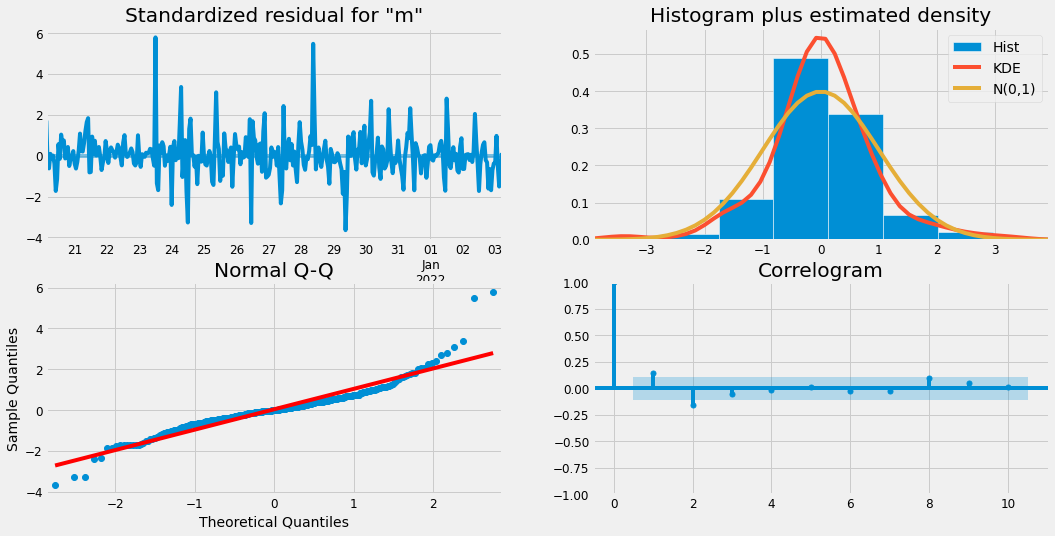

In [18]:
#run model diagnostic to investigate any unusual behavior
result1.plot_diagnostics(figsize = (16, 8))
plt.show()

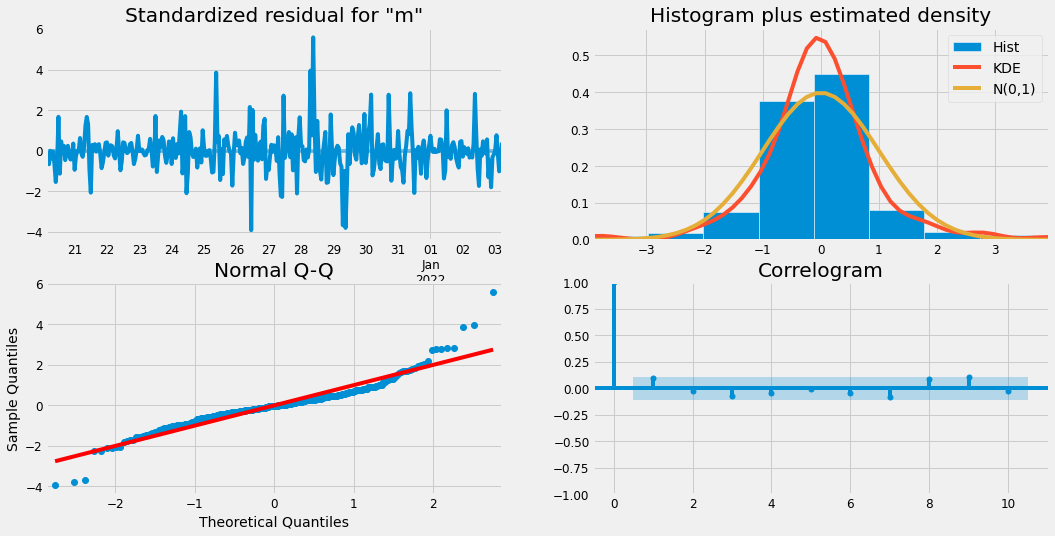

In [19]:
#run model diagnostic to investigate any unusual behavior
result2.plot_diagnostics(figsize = (16, 8))
plt.show()

In [33]:
prediction1 = result1.get_prediction(start = pd.to_datetime('2022-01-01').tz_localize('Africa/Nairobi'), dynamic = False)
prediction_ci1 = prediction1.conf_int()
prediction_ci1

,lower mq7,upper mq7
timestamp,,
2022-01-01 00:00:00+03:00,58.792026,102.521649
2022-01-01 01:00:00+03:00,61.695335,105.424687
2022-01-01 02:00:00+03:00,60.089687,103.818771
2022-01-01 03:00:00+03:00,58.343357,102.072174
2022-01-01 04:00:00+03:00,59.189876,102.918427
2022-01-01 05:00:00+03:00,57.086068,100.814356
2022-01-01 06:00:00+03:00,55.843973,99.571999
2022-01-01 07:00:00+03:00,59.745464,103.473231
2022-01-01 08:00:00+03:00,66.710968,110.438476


In [34]:
prediction2 = result2.get_prediction(start = pd.to_datetime('2022-01-01').tz_localize('Africa/Nairobi'), dynamic = False)
prediction_ci2 = prediction2.conf_int()
prediction_ci2

,lower mq135,upper mq135
timestamp,,
2022-01-01 00:00:00+03:00,27.331058,50.430955
2022-01-01 01:00:00+03:00,28.769178,51.868934
2022-01-01 02:00:00+03:00,28.359101,51.458716
2022-01-01 03:00:00+03:00,28.528088,51.627562
2022-01-01 04:00:00+03:00,28.392341,51.491676
2022-01-01 05:00:00+03:00,26.424960,49.524158
2022-01-01 06:00:00+03:00,25.660404,48.759465
2022-01-01 07:00:00+03:00,27.135010,50.233935
2022-01-01 08:00:00+03:00,32.277857,55.376647


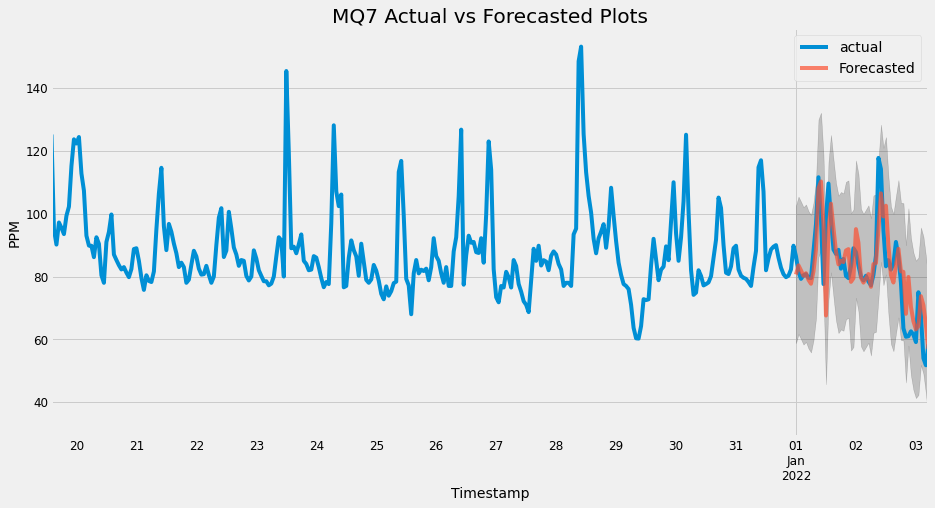

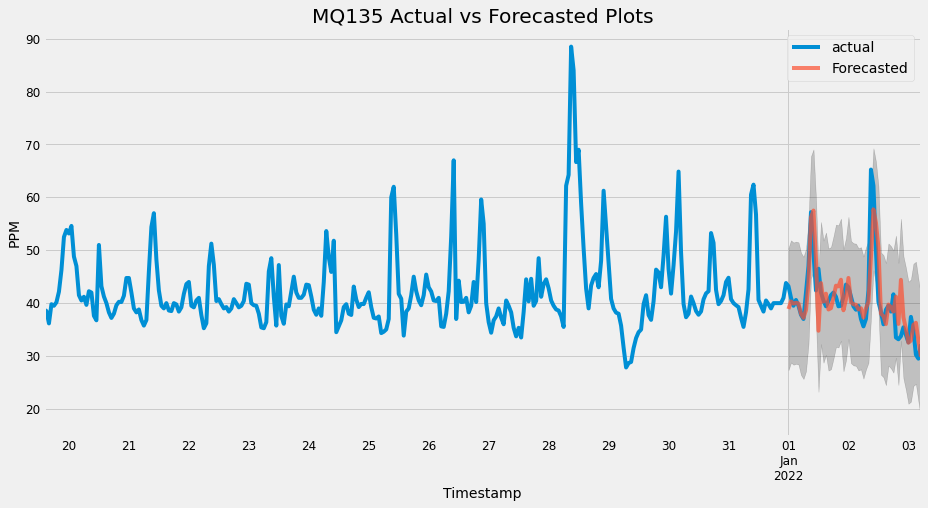

In [40]:
plt.ion()

#Visualize the forecasting
ax = y_mq7['2021':].plot(label = 'actual', title="MQ7 Actual vs Forecasted Plots")
prediction1.predicted_mean.plot(ax = ax, label = "Forecasted", alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci1.index, prediction_ci1.iloc[:, 0], prediction_ci1.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Timestamp")
ax.set_ylabel('PPM')
plt.legend()
plt.show()


ax = y_mq135['2021':].plot(label = 'actual', title="MQ135 Actual vs Forecasted Plots")
prediction2.predicted_mean.plot(ax = ax, label = "Forecasted", alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci2.index, prediction_ci2.iloc[:, 0], prediction_ci2.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Timestamp")
ax.set_ylabel('PPM')
plt.legend()
plt.show()

In [36]:
model1_filename = "models/model1.pkl"  

with open(model1_filename, 'wb') as file:  
    pickle.dump(result1, file)

In [37]:
model2_filename = "models/model2.pkl"  

with open(model2_filename, 'wb') as file:  
    pickle.dump(result2, file)

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_mq7.index, y=list(y_mq7),
                    mode='lines',
                    name='Actual'))
fig.add_trace(go.Scatter(x=prediction_ci1.index, y=prediction_ci1.mean(axis=1),
                    mode='lines',
                    name='Predicted'))
fig.update_xaxes(title_text='Date/Time')
fig.update_yaxes(title_text="Parts Per Million")
fig.update_layout(
    title={
        'text': "MQ7 Sensor Data vs Forecasted Values against Time",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    })
fig.show()

In [51]:
prediction1